# Project on Cardiac Attack Risk Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('cardiac_risk.csv')
df

,id,age in days,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,52,2,168,62.0,110,80,95.0,1,1,0,0,1,0
1,1,20228,57,1,156,85.0,140,90,115.0,3,1,0,0,1,1
2,2,18857,53,1,165,64.0,130,70,100.0,3,1,0,0,0,1
3,3,17623,50,2,169,82.0,150,100,125.0,1,1,0,0,1,1
4,4,17474,49,1,156,56.0,100,60,80.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,54,2,168,76.0,120,80,100.0,1,1,1,0,1,0
69996,99995,22601,63,1,158,126.0,140,90,115.0,2,2,0,0,1,1
69997,99996,19066,54,2,183,105.0,180,90,135.0,3,1,0,1,0,1
69998,99998,22431,63,1,163,72.0,135,80,107.5,1,2,0,0,0,1


In [3]:
df.columns

Index(['id', 'age in days', 'age', 'gender', 'height_in_cm', 'weight_in_kg',
       'bp_hi', 'bp_lo', 'avg_heart_rate', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio'],
      dtype='object')

In [4]:
df=df.drop(['age in days','bp_hi','bp_lo'],axis=1)
df.head()

,id,age,gender,height_in_cm,weight_in_kg,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,0,52,2,168,62.0,95.0,1,1,0,0,1,0
1,1,57,1,156,85.0,115.0,3,1,0,0,1,1
2,2,53,1,165,64.0,100.0,3,1,0,0,0,1
3,3,50,2,169,82.0,125.0,1,1,0,0,1,1
4,4,49,1,156,56.0,80.0,1,1,0,0,0,0


In [5]:
df.set_index('id',inplace=True)

In [6]:
df.columns

Index(['age', 'gender', 'height_in_cm', 'weight_in_kg', 'avg_heart_rate',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
df

,age,gender,height_in_cm,weight_in_kg,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,
0,52,2,168,62.0,95.0,1,1,0,0,1,0
1,57,1,156,85.0,115.0,3,1,0,0,1,1
2,53,1,165,64.0,100.0,3,1,0,0,0,1
3,50,2,169,82.0,125.0,1,1,0,0,1,1
4,49,1,156,56.0,80.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,54,2,168,76.0,100.0,1,1,1,0,1,0
99995,63,1,158,126.0,115.0,2,2,0,0,1,1
99996,54,2,183,105.0,135.0,3,1,0,1,0,1


In [8]:
df.isnull().sum()

age               0
gender            0
height_in_cm      0
weight_in_kg      0
avg_heart_rate    0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
dtype: int64

<AxesSubplot:ylabel='id'>

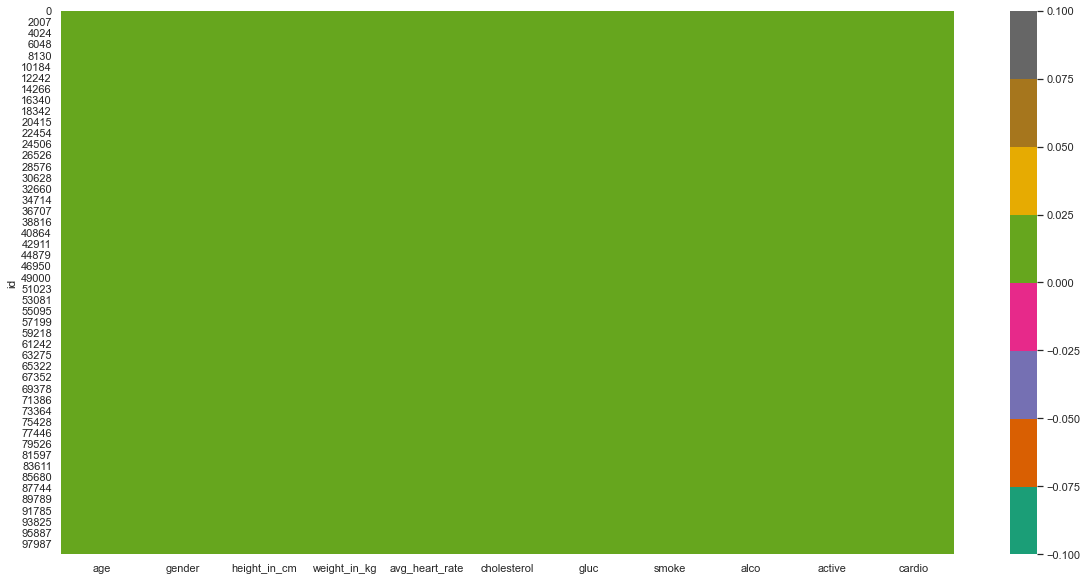

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df.isnull(),cmap='Dark2')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             70000 non-null  int64  
 1   gender          70000 non-null  int64  
 2   height_in_cm    70000 non-null  int64  
 3   weight_in_kg    70000 non-null  float64
 4   avg_heart_rate  70000 non-null  float64
 5   cholesterol     70000 non-null  int64  
 6   gluc            70000 non-null  int64  
 7   smoke           70000 non-null  int64  
 8   alco            70000 non-null  int64  
 9   active          70000 non-null  int64  
 10  cardio          70000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 6.4 MB


# Removing Biasness from data

In [11]:
df.smoke.value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [12]:
li = list(df[df.smoke == 0].sample(n=57500).index)

In [13]:
df.drop(li, inplace=True)

In [14]:
df.smoke.value_counts()

0    6331
1    6169
Name: smoke, dtype: int64

In [15]:
df.alco.value_counts()

0    10472
1     2028
Name: alco, dtype: int64

In [16]:
li1 = list(df[df.alco == 0].sample(n=8000).index)

In [17]:
df.drop(li1, inplace=True)

In [18]:
df.alco.value_counts()

0    2472
1    2028
Name: alco, dtype: int64

In [19]:
df.cardio.value_counts()

0    2349
1    2151
Name: cardio, dtype: int64

In [20]:
df.active.value_counts()

1    3731
0     769
Name: active, dtype: int64

In [21]:
li2 = list(df[df.active == 1].sample(n=3000).index)

In [22]:
df.drop(li2, inplace=True)

In [23]:
df.active.value_counts()

0    769
1    731
Name: active, dtype: int64

In [24]:
df

,age,gender,height_in_cm,weight_in_kg,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,
65,51,1,160,75.0,80.0,1,1,0,0,0,0
170,55,2,153,47.0,105.0,3,1,1,0,1,0
173,62,1,176,74.0,100.0,1,1,0,0,1,1
180,60,2,174,90.0,110.0,1,1,1,1,0,1
217,45,1,165,66.0,90.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99686,55,2,170,77.0,115.0,1,1,1,1,1,1
99834,55,2,173,68.0,120.0,1,2,1,0,0,1
99933,54,2,167,74.0,105.0,1,1,1,1,1,0


# Visualization of corelation among factors

<AxesSubplot:>

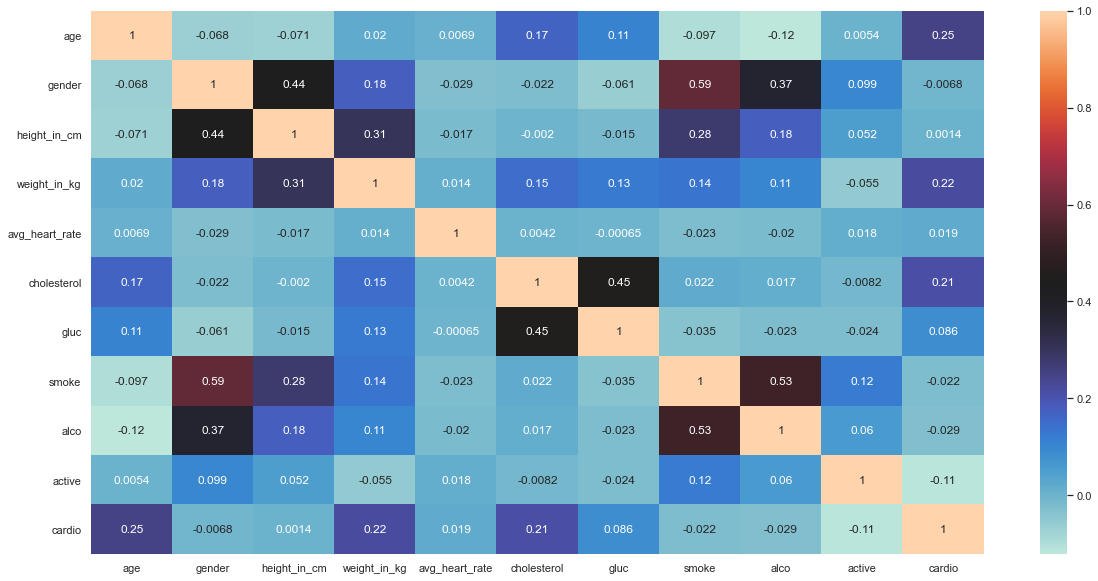

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='icefire' ,annot=True)

<AxesSubplot:xlabel='gender', ylabel='cardio'>

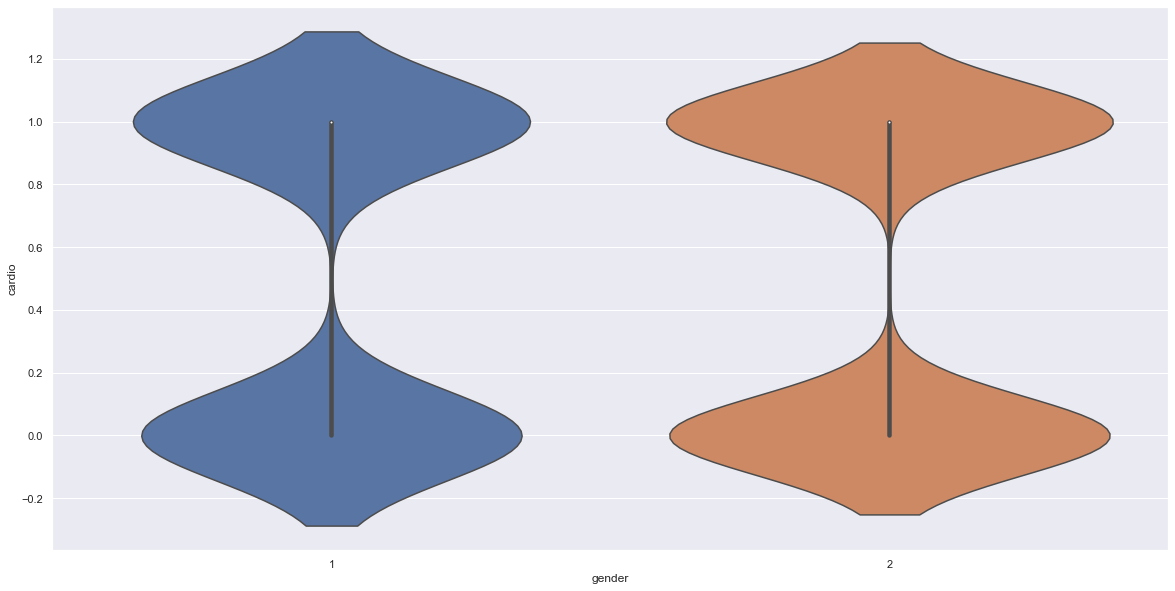

In [26]:
sns.violinplot(x='gender',y='cardio',data=df)

<AxesSubplot:xlabel='cardio', ylabel='cholesterol'>

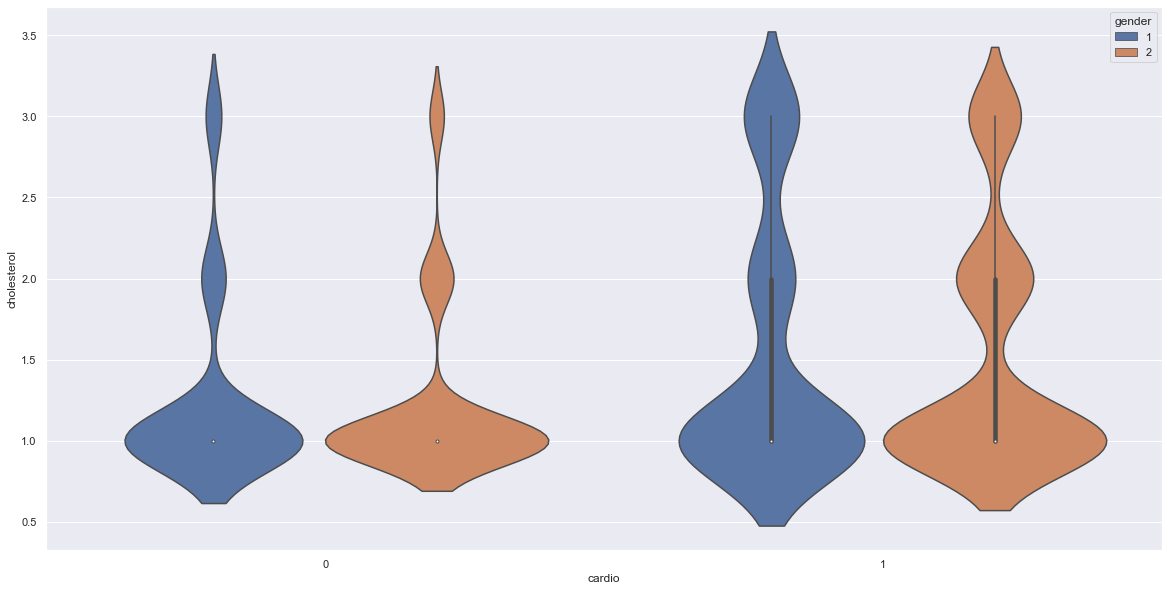

In [27]:
sns.violinplot(x='cardio',y='cholesterol',data=df,hue='gender')

<AxesSubplot:xlabel='cardio', ylabel='gluc'>

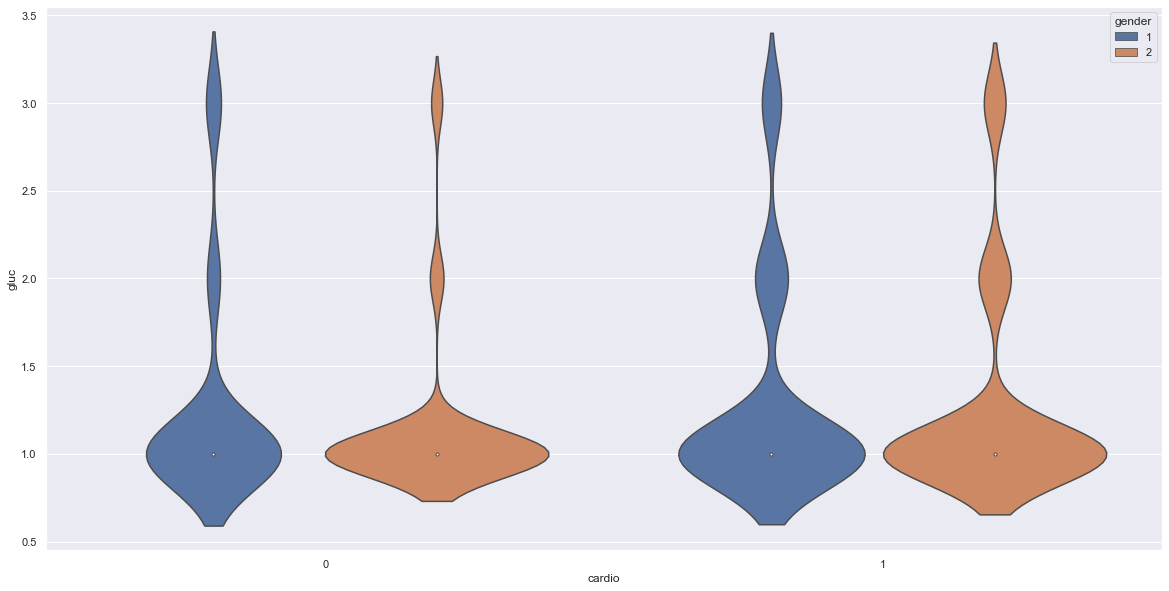

In [28]:
sns.violinplot(x='cardio',y='gluc',data=df,hue='gender')

<AxesSubplot:xlabel='cardio', ylabel='smoke'>

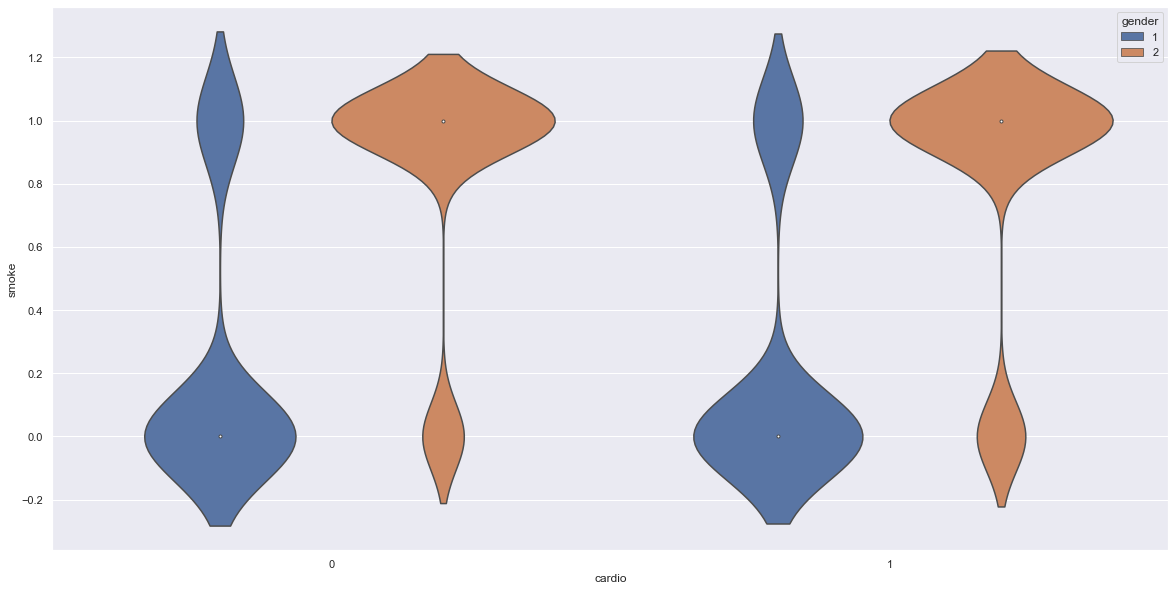

In [29]:
sns.violinplot(x='cardio',y='smoke',data=df,hue='gender')

<AxesSubplot:xlabel='cardio', ylabel='alco'>

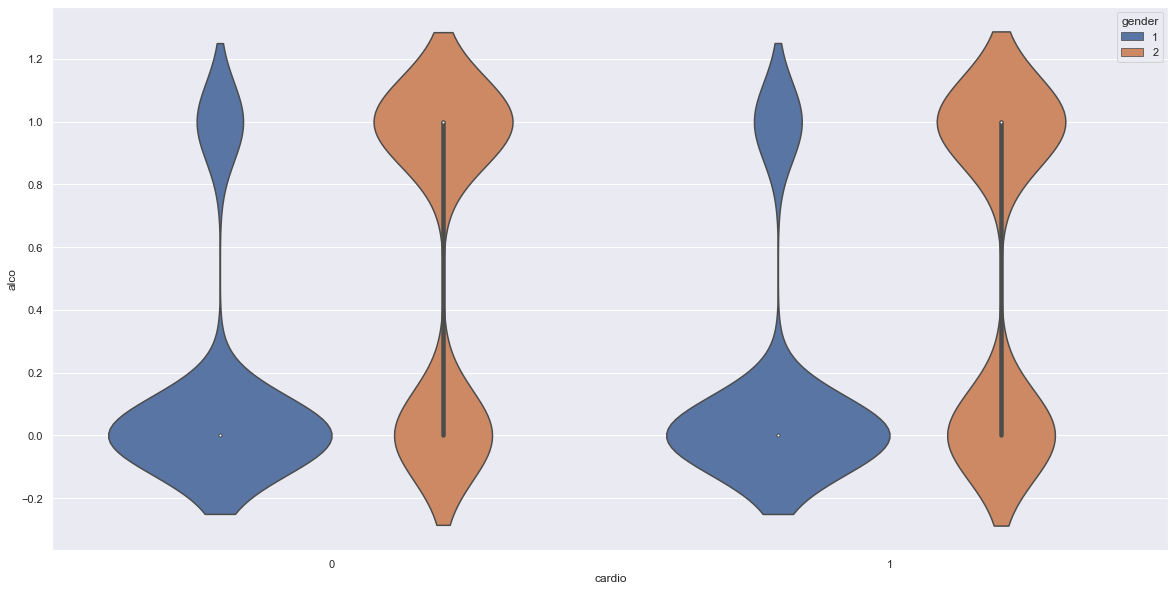

In [30]:
sns.violinplot(x='cardio',y='alco',data=df,hue='gender')

<AxesSubplot:xlabel='cardio', ylabel='active'>

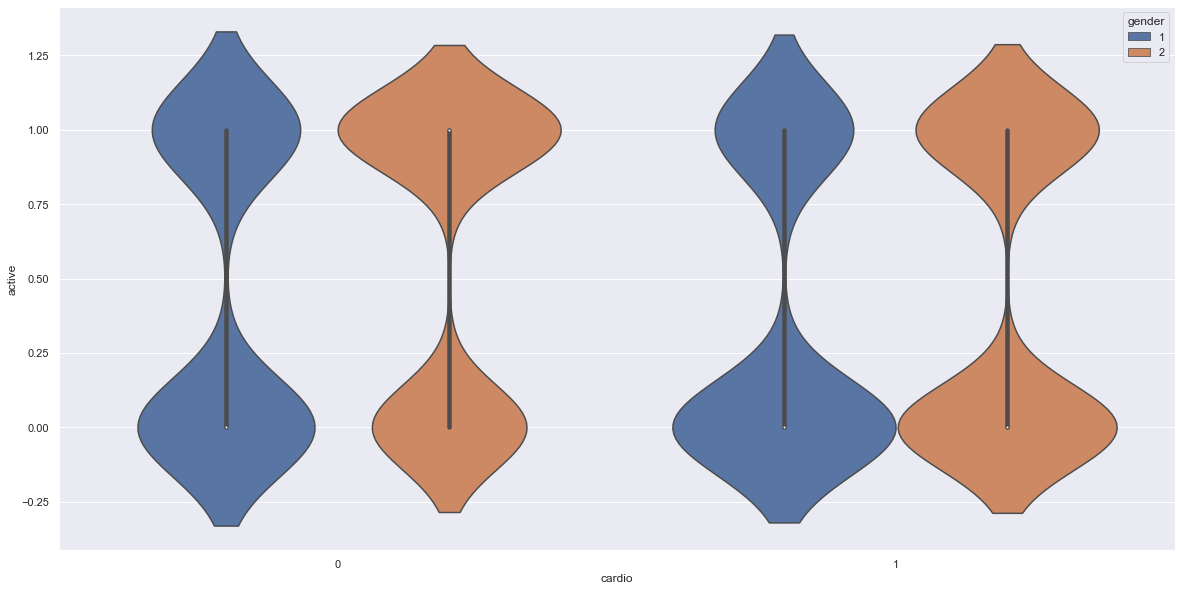

In [31]:
sns.violinplot(x='cardio',y='active',data=df,hue='gender')

# Analysis using different Classification Models

In [32]:
x=df.drop('cardio',axis=1)
y=df.cardio

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=150)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [35]:
log.fit(x_train, y_train)

LogisticRegression()

In [36]:
log.score(x_train,y_train)

0.6558333333333334

In [37]:
from sklearn import ensemble
reg = ensemble.GradientBoostingClassifier(learning_rate = 0.065,n_estimators=500)
reg.fit(x_train, y_train)
reg.score(x_train, y_train)

0.88

In [38]:
predicted_reg = reg.predict(x)
predicted_reg = pd.DataFrame(predicted_reg)
predicted_reg

,0
0,0
1,0
2,0
3,1
4,0
...,...
1495,1
1496,1
1497,0
1498,0


In [39]:
predicted_reg[predicted_reg == 0].count()

0    767
dtype: int64

In [40]:
predicted_reg[predicted_reg == 1].count()

0    733
dtype: int64

In [41]:
from sklearn.metrics import classification_report
y_pred = reg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       146
           1       0.75      0.73      0.74       154

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



# Confusion Metrics

In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Print the Confusion Matrix')
print(cm)

Print the Confusion Matrix
[[108  38]
 [ 42 112]]


<AxesSubplot:>

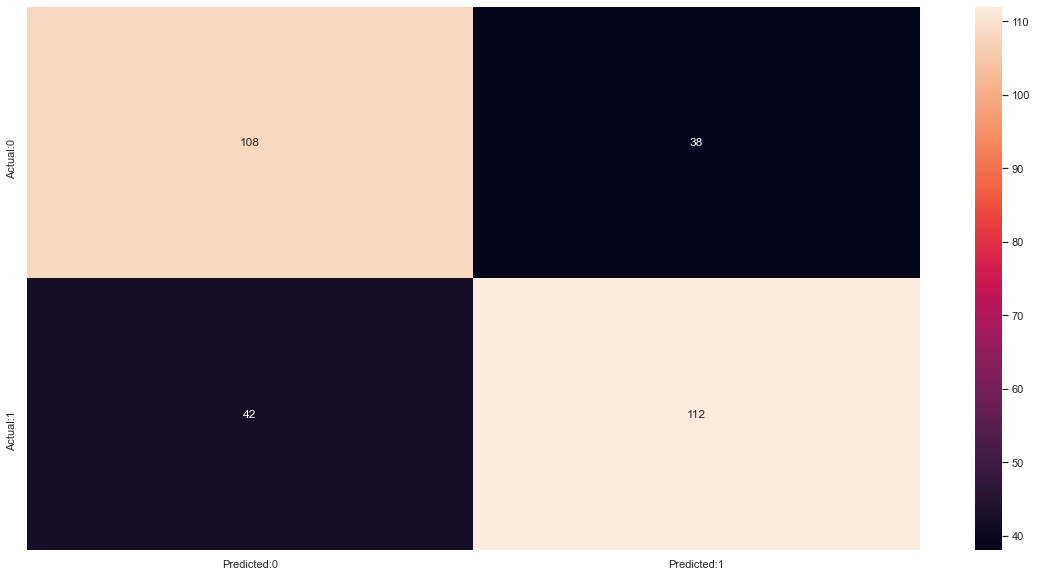

In [43]:
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True,fmt='d')

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(x)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).sort_values()

avg_heart_rate      1.002030
active              1.024478
age                 1.053081
weight_in_kg        1.152107
gluc                1.271103
cholesterol         1.299762
height_in_cm        1.337876
alco                1.414305
gender              1.779956
smoke               1.866079
const             462.917524
dtype: float64

In [45]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X.columns:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = p

Significance.sort_values()

avg_heart_rate    6.079557e-55
cholesterol       1.220073e-15
age               1.353268e-13
active            1.190458e-05
gluc              6.978651e-05
weight_in_kg      1.220381e-04
alco              2.788050e-01
smoke             4.141236e-01
height_in_cm      8.121420e-01
gender            8.330872e-01
const             1.000000e+00
dtype: float64

# Decision Tree

In [46]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [47]:
dt.fit(x,y)

DecisionTreeClassifier()

In [48]:
dt.score(x,y)

1.0

In [49]:
predicted_dt= dt.predict(x)
predicted_dt=pd.DataFrame(data=predicted_dt)
predicted_dt

,0
0,0
1,0
2,1
3,1
4,0
...,...
1495,1
1496,1
1497,0
1498,1


In [50]:
predicted_dt[predicted_dt == 0].count()

0    741
dtype: int64

In [51]:
predicted_dt[predicted_dt == 1].count()

0    759
dtype: int64

# Random Forest

In [52]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()

In [53]:
rf.fit(x,y)

RandomForestClassifier()

In [54]:
rf.score(x,y)

1.0

In [55]:
predicted_rf= rf.predict(x)
predicted_rf=pd.DataFrame(data=predicted_rf)
predicted_rf

,0
0,0
1,0
2,1
3,1
4,0
...,...
1495,1
1496,1
1497,0
1498,1


In [56]:
predicted_rf[predicted_rf == 0].count()

0    741
dtype: int64

In [57]:
predicted_rf[predicted_rf == 1].count()

0    759
dtype: int64

# Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 

In [59]:
gnb.fit(x_train, y_train) 

GaussianNB()

In [60]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [61]:
predicted_gnb = log.predict(x)
predicted_gnb=pd.DataFrame(data=predicted_gnb)
predicted_gnb

,0
0,1
1,1
2,0
3,1
4,0
...,...
1495,0
1496,0
1497,0
1498,0


In [62]:
predicted_gnb[predicted_gnb == 0].count()

0    768
dtype: int64

In [63]:
predicted_gnb[predicted_gnb == 1].count()

0    732
dtype: int64

In [64]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y,predicted_gnb)*100)

Gaussian Naive Bayes model accuracy(in %): 65.53333333333333


# Conclusion

In [65]:
import statistics

In [66]:
values_0 = [predicted_reg[predicted_reg == 0].count(), predicted_dt[predicted_dt == 0].count(),predicted_rf[predicted_rf == 0].count(),predicted_gnb[predicted_gnb == 0].count()]
values_0

[0    767
 dtype: int64,
 0    741
 dtype: int64,
 0    741
 dtype: int64,
 0    768
 dtype: int64]

In [67]:
values_1 = [predicted_reg[predicted_reg == 1].count(), predicted_dt[predicted_dt == 1].count(),predicted_rf[predicted_rf == 1].count(),predicted_gnb[predicted_gnb == 1].count()]
values_1

[0    733
 dtype: int64,
 0    759
 dtype: int64,
 0    759
 dtype: int64,
 0    732
 dtype: int64]

In [81]:
avg_0=statistics.mean([767,741,741,768])
print('Average number of people who do not have risk of cardiac attack: ', avg_0)

Average number of people who do not have risk of cardiac attack:  754.25


In [82]:
avg_1=statistics.mean([733,759,759,732])
print('Average number of people who have risk of cardiac attack: ', avg_1)

Average number of people who have risk of cardiac attack:  745.75


In [83]:
a=(avg_1/1500)*100
print('Percent of people who have risk of cardiac attack',a)

Percent of people who have risk of cardiac attack 49.71666666666666


# According to the average result of all the classifires *out of 1500 people 760 people* have risk of cardiac attack.

## Thus, we can say that *almost 50%* of the people have risk of cardiac attack.

# Evaluation of scores of all the models using KFold

In [71]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=10)

for train_index,test_index in kf.split(x,y):
    print(train_index,test_index)

[ 148  151  152 ... 1497 1498 1499] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 149 150]
[   0    1    2 ... 1497 1498 1499] [148 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 2

In [72]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [73]:
get_score(LogisticRegression(),x_train,x_test,y_train,y_test)

0.6533333333333333

In [74]:
get_score(tree.DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

0.6766666666666666

In [75]:
get_score(ensemble.RandomForestClassifier(),x_train,x_test,y_train,y_test)

0.74

In [76]:
get_score(GaussianNB() ,x_train,x_test,y_train,y_test)

0.6166666666666667

In [77]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),x,y)

array([0.67      , 0.65333333, 0.64666667, 0.69      , 0.65333333])

In [78]:
cross_val_score(tree.DecisionTreeClassifier(),x,y)

array([0.63      , 0.66      , 0.64      , 0.65      , 0.66333333])

In [79]:
cross_val_score(ensemble.RandomForestClassifier(),x,y)

array([0.70333333, 0.72      , 0.75666667, 0.74333333, 0.70666667])

In [80]:
cross_val_score(GaussianNB(),x,y)

array([0.58      , 0.58      , 0.59      , 0.63333333, 0.54666667])